
#**Amazon Fine Food Reviews**


## **Context:**

- **This dataset consists of reviews of fine foods from Amazon.**
- **The data spans a period of more than 10 years, including all ~500,000    reviews up to October 2012. Reviews include a plain text review.**
- **It also includes reviews from all other Amazon categories.**

#### The purpose of this analysis is to explore the numerous features and build a classification model where we will be able to tag the rating based on the description and consequently rate them as positive or negative. In this analysis, we will be focusing on score, summary, description and score based sentiment features.



##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers,
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


In [1]:
!pip install contractions

In [3]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:

# Load dataset.
import pandas as pd
data=pd.read_csv('Reviews.csv')

In [7]:
data.shape                                               # print shape of data.

(568454, 10)

In [9]:
data.head()                                              # Print first 5 rows of data.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
data["Sentiment"] = data["Score"].apply(lambda score: "positive" if score > 3 else "negative")                          #Addition of Sentiment column based on Score
data["Usefulness"] = (data["HelpfulnessNumerator"]/data["HelpfulnessDenominator"]).apply(lambda n: "useful" if n > 0.8 else "Notuseful")    #Addition of Usefulness column based on helpfullness parameter

In [13]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Usefulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,Notuseful
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,useful
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,useful
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,Notuseful


In [15]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping relevant columns from the data, as these are useful for our analysis.

data = data.loc[:49999, ['Score','Summary','Text','Sentiment','Usefulness']]

In [17]:
data.isnull().sum(axis=0)                                # Check for NULL values.

Score         0
Summary       2
Text          0
Sentiment     0
Usefulness    0
dtype: int64

In [19]:
data=data.dropna()                                     # Dropping off missing values
data.columns                                           # Print the column of the dataframe

Index(['Score', 'Summary', 'Text', 'Sentiment', 'Usefulness'], dtype='object')

In [21]:
data.shape                                            #Shape of the data

(49998, 5)

In [23]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [25]:
data.shape                                # Shape of data

(49998, 5)

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

Used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [28]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(lambda x: strip_html(x))
data['Summary'] = data['Summary'].apply(lambda x: strip_html(x))

data.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10916\2357479661.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [29]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['Text'] = data['Text'].apply(lambda x: replace_contractions(x))
data['Summary'] = data['Summary'].apply(lambda x: replace_contractions(x))

data.head()

,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [30]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['Text'] = data['Text'].apply(lambda x: remove_numbers(x))
data['Summary'] = data['Summary'].apply(lambda x: remove_numbers(x))

data.head()

,Score,Summary,Text,Sentiment,Usefulness
0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,positive,useful
1,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",negative,Notuseful
2,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",positive,useful
3,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,negative,useful
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",positive,Notuseful


In [32]:
data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data
data['Summary'] = data.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1) # Tokenization of data

In [35]:
data.head()                                                                    # Look at how tokenized data looks.

,Score,Summary,Text,Sentiment,Usefulness
0,5,"[Good, Quality, Dog, Food]","[I, have, bought, several, of, the, Vitality, canned, dog, food, products, and, have, found, them, all, to, be, of, good, quality, ., The, product, looks, more, like, a, stew, than, a, processed, meat, and, it, smells, better, ., My, Labrador, is, finicky, and, she, appreciates, this, product, better, than, most, .]",positive,useful
1,1,"[Not, as, Advertised]","[Product, arrived, labeled, as, Jumbo, Salted, Peanuts, ..., the, peanuts, were, actually, small, sized, unsalted, ., Not, sure, if, this, was, an, error, or, if, the, vendor, intended, to, represent, the, product, as, ``, Jumbo, '', .]",negative,Notuseful
2,4,"[``, Delight, '', says, it, all]","[This, is, a, confection, that, has, been, around, a, few, centuries, ., It, is, a, light, ,, pillowy, citrus, gelatin, with, nuts, -, in, this, case, Filberts, ., And, it, is, cut, into, tiny, squares, and, then, liberally, coated, with, powdered, sugar, ., And, it, is, a, tiny, mouthful, of, heaven, ., Not, too, chewy, ,, and, very, flavorful, ., I, highly, recommend, this, yummy, treat, ., If, you, are, familiar, with, the, story, of, C.S, ., Lewis, ', ``, The, Lion, ,, The, Witch, ,, and, The, Wardrobe, '', -, this, is, the, treat, that, seduces, Edmund, into, selling, ...]",positive,useful
3,2,"[Cough, Medicine]","[If, you, are, looking, for, the, secret, ingredient, in, Robitussin, I, believe, I, have, found, it, ., I, got, this, in, addition, to, the, Root, Beer, Extract, I, ordered, (, which, was, good, ), and, made, some, cherry, soda, ., The, flavor, is, very, medicinal, .]",negative,useful
4,5,"[Great, taffy]","[Great, taffy, at, a, great, price, ., There, was, a, wide, assortment, of, yummy, taffy, ., Delivery, was, very, quick, ., If, your, a, taffy, lover, ,, this, is, a, deal, .]",positive,Notuseful


In [38]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [40]:
len(stopwords)

165

In [42]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data['Summary'] = data.apply(lambda row: normalize(row['Summary']), axis=1)
data.head()

,Score,Summary,Text,Sentiment,Usefulness
0,5,good quality dog food,buy several vitality can dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better,positive,useful
1,1,not advertise,product arrive label jumbo salt peanuts peanuts actually small size unsalted not sure error vendor intend represent product jumbo,negative,Notuseful
2,4,delight say,confection around centuries light pillowy citrus gelatin nut case filberts cut tiny square liberally coat powder sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduce edmund sell brother sisters witch,positive,useful
3,2,cough medicine,look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal,negative,useful
4,5,great taffy,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,positive,Notuseful


### **Word Cloud based on Summary and Score**

In [44]:
pip install wordcloud

In [46]:
data['Summary'] = data.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Summary'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

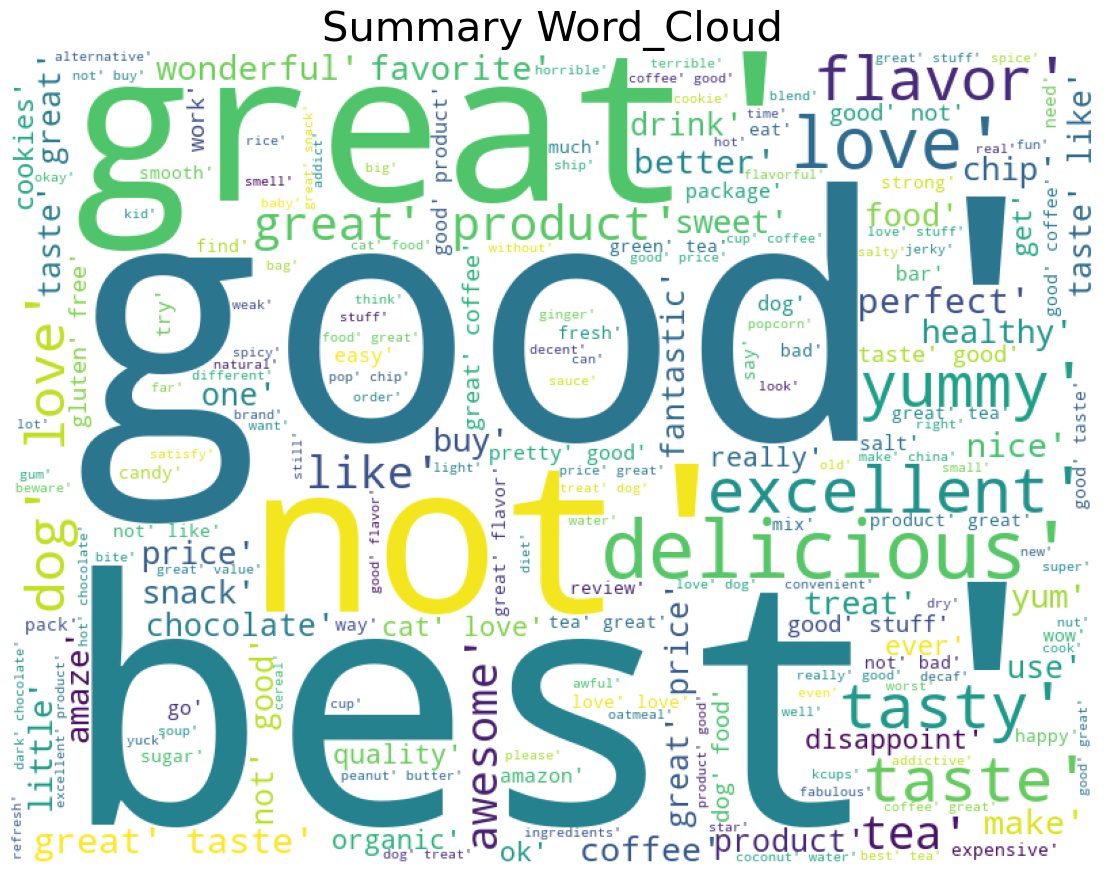

In [48]:
show_wordcloud(data,'Summary Word_Cloud')


- Most of the word in the word summary column are positive sentiment in nature
- We can see the most frequent words choosen by consumers to express their sentiment for the products

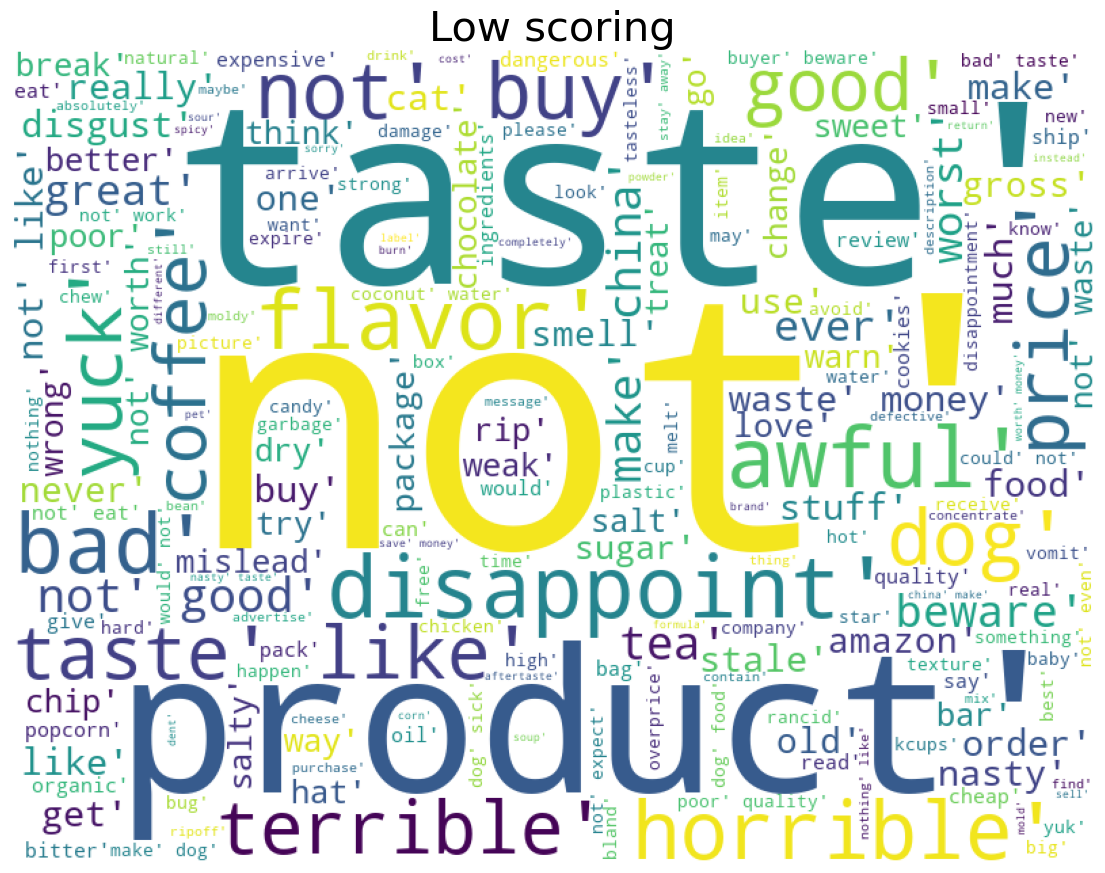

In [52]:
show_wordcloud(data[data.Score == 1], title = "Low scoring")

- Consumers are complaining about taste,product & sharing their experience as horrible , disappoint etc.


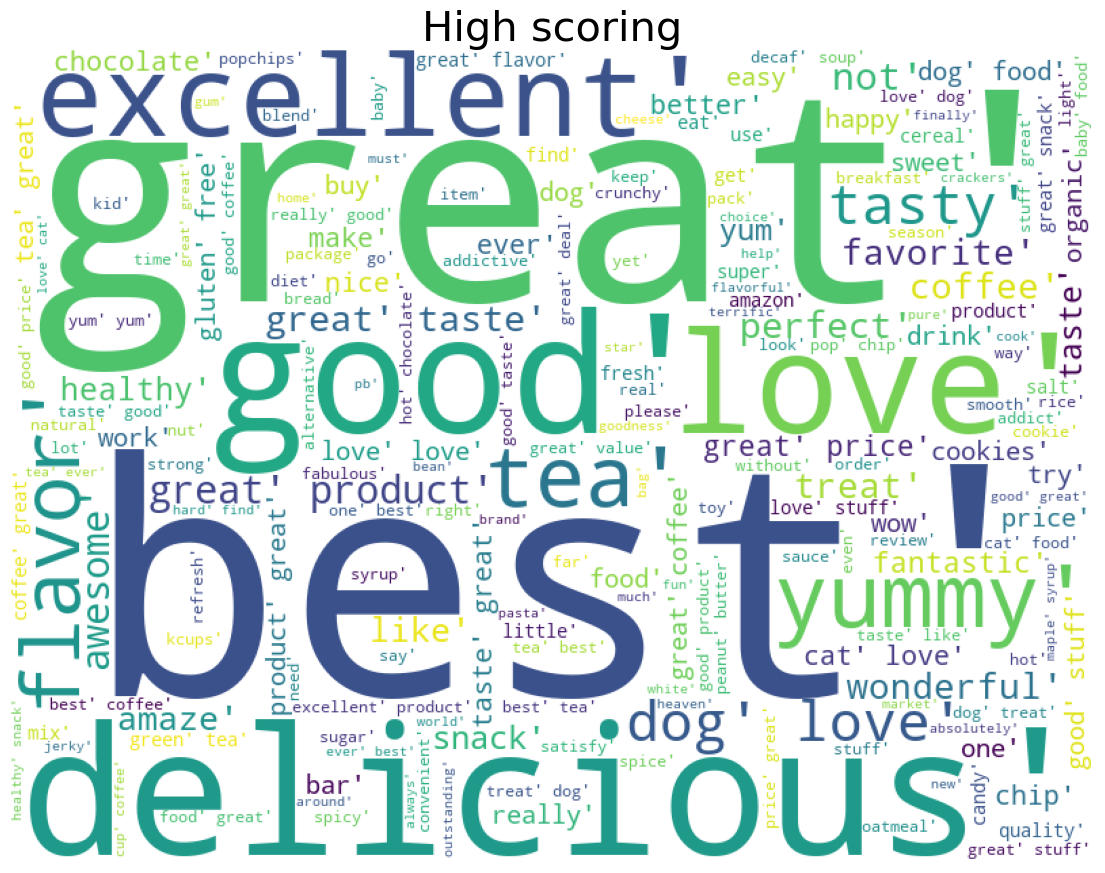

In [55]:
show_wordcloud(data[data.Score == 5], title = "High scoring")

- We can see the different degree of sentiment words are used by consumers to express their emotions for high scored rated product.

### **Building the model based on CountVectorizer and Random Forest**

In [59]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['Text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [61]:
data_features.shape

(49998, 2000)

In [63]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
labels = data['Score']
labels = labels.astype('int')

In [67]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [69]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6769869413882776


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [71]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [74]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

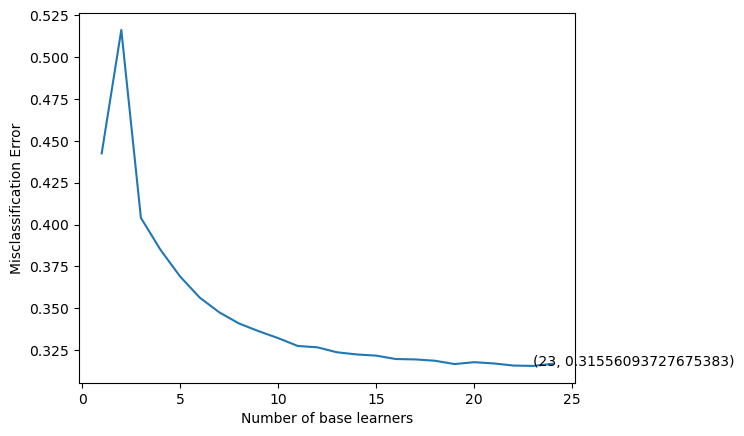

In [76]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [78]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = 20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6872666666666667

In [80]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[ 599   27   44   38  726]
 [ 124  108   50   60  517]
 [  82   25  209  125  790]
 [  45   13   51  426 1666]
 [  85   11   39  173 8967]]
0.6872666666666667


<Axes: >

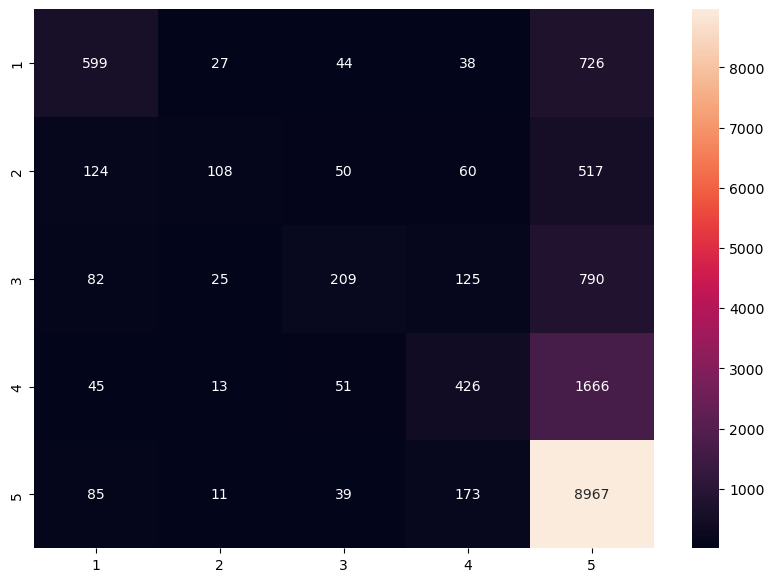

In [82]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**

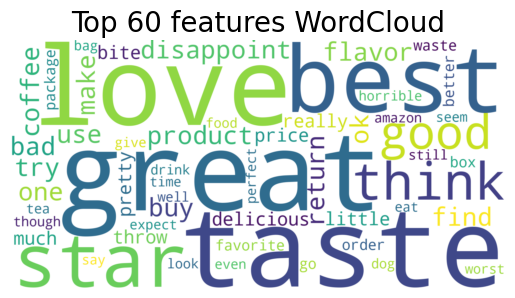

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = bow_vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:60])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(20, 15), frameon='equal')
plt.title('Top 60 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()


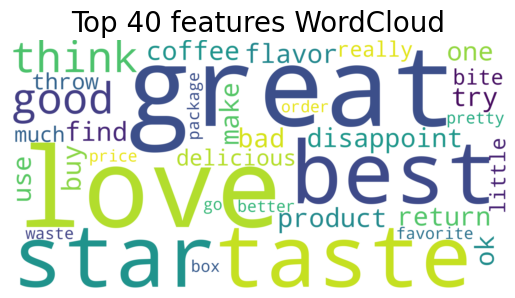

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = bow_vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:40])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()


### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [90]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['Text'])

data_features = data_features.toarray()

data_features.shape

(49998, 2000)

In [92]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [94]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6786272767276728


In [96]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

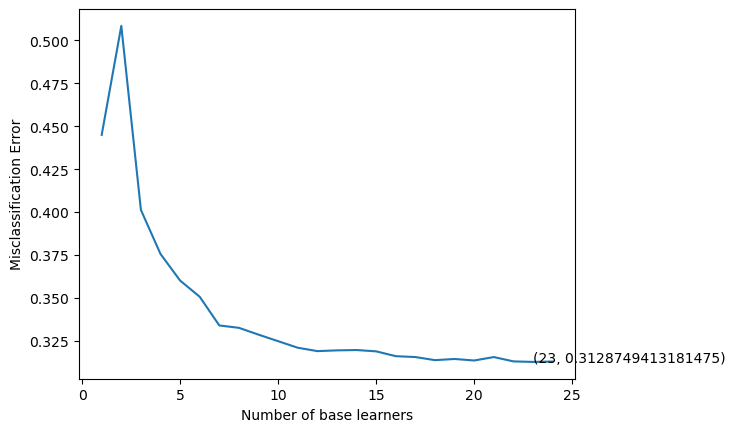

In [98]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [100]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = 21)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6915333333333333

In [102]:
result = clf.predict(X_test)

[[ 591   21   32   28  762]
 [ 127  104   38   53  537]
 [  65   13  209   92  852]
 [  46    5   41  407 1702]
 [  66    9   28  110 9062]]
0.6915333333333333


<Axes: >

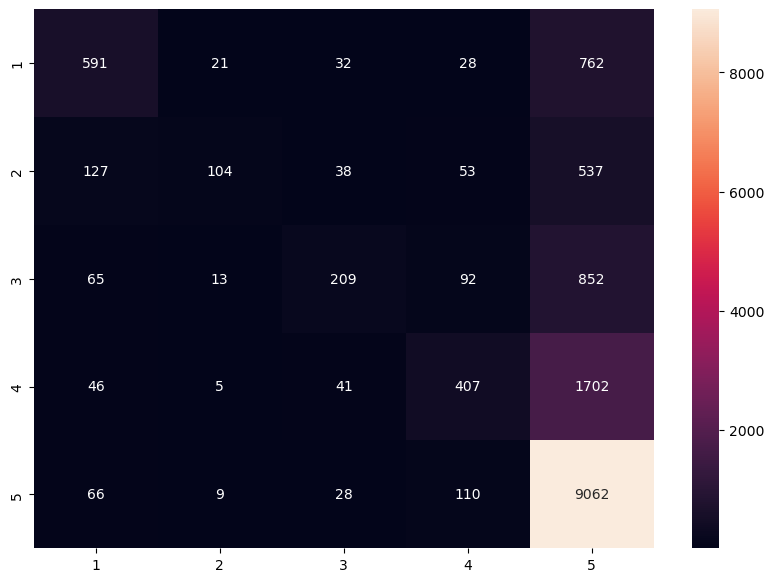

In [104]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

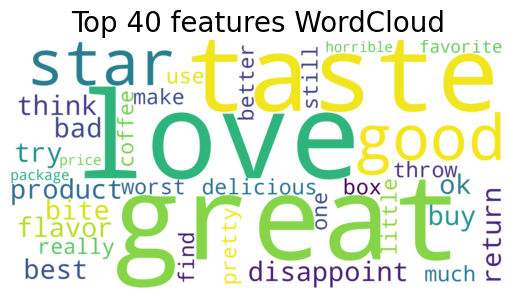

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clf' is a trained classifier
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]

# Assuming 'bow_vec' is your CountVectorizer
all_features = bow_vec.get_feature_names_out()

top_features = ' '.join(all_features[i] for i in features[0:40])

wordcloud = WordCloud(
    background_color="white",
    colormap='viridis',
    width=2000,
    height=1000
).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()


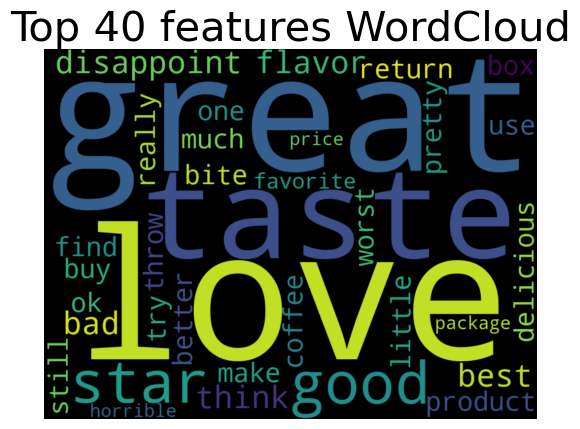

In [108]:

all_features = vectorizer.get_feature_names_out()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '


from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000,
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

### **Summary**:

- This project analyzes Amazon food reviews to perform sentiment classification based on textual feedback and corresponding 1-5 ratings. The analysis involved feature engineering to derive sentiment labels (positive/negative) and usefulness metrics from review scores. The text preprocessing pipeline included HTML tag removal, contraction handling, tokenization, stopword filtering, and lemmatization. Word Cloud visualizations revealed key terms distinguishing high and low-rated reviews. Text vectorization techniques converted processed content into numerical features for model training. The classification model demonstrated satisfactory performance, though accuracy could potentially improve by expanding the training dataset beyond the current 50,000 sample subset. Further enhancements might involve optimizing vectorizer parameters, exploring alternative preprocessing methods, and implementing more sophisticated model tuning approaches to boost predictive performance. The implementation successfully demonstrates an end-to-end text classification workflow while identifying multiple avenues for future performance improvements.
